In [4]:
import os
import pandas as pd
import networkx as nx

output_folder = 'figs'
os.system('mkdir -p '+output_folder) # create output folder where all figures will be saved
# Some defaults for figures e.g. font size, label size, line width etc. 
fontsize = 34
labelsize = 26
lw = 4

Figure 4
----

input file:  5/measure_ER_15_22_appr_reach_2.queries.csv
input shape:  (5005, 12)
input file:  5/measure_ER_15_22_appr_reach_4.queries.csv
input shape:  (5005, 12)
optimal  T  :  6
saved figure:  figs/er_appr_reach_Tloop.pdf


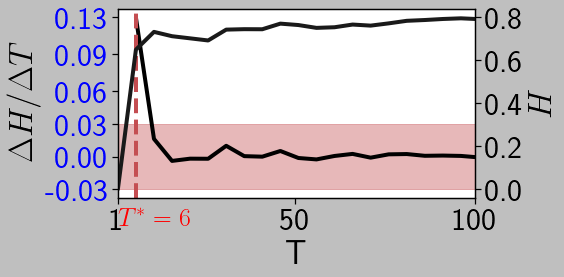

<Figure size 864x288 with 0 Axes>

In [85]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

### SWITCH to plot 'reach' or 'sp' with the following two lines.
pr = 'reach'
alg = 'appr'
data = 'ER_15_22'
input_folder = '5'
# data = 'flickr'
# data = 'rome'
# data = 'biomine'
_max = -1
invert = True
loop = 'T'
epsilon = [0.001,0.03][loop=='T']
step = 5
final = []
for q in [2,4]:
    qset = str(q)+'.queries.csv'
    # qset = str(q)+'.queries_NLoops.csv'
    fname = input_folder+'/measure_'+data+'_'+alg+'_'+pr+'_'+qset 
    print('input file: ',fname)
    df = pd.read_csv(fname)
    df[loop] = df[loop].astype('int')
    print('input shape: ',df.shape)
    # print(df[loop].head(10))
    # print(df[loop]%5 == 1)
    if step>1:
        df = df[df[loop]% step==1]
    final.append(df)
df = pd.concat(final)
if invert:
    df  = df.iloc[::-1]
avg_df = df.groupby(loop)[['N','T','H']].mean()
avg_df['dHdN'] = avg_df['H'].diff()/avg_df[loop].diff()
boole = (avg_df['dHdN'].abs()<=epsilon)
_last_False =  (boole[boole==False].index[-1])
opt = avg_df[avg_df.index==_last_False][loop].values[0]
print('optimal ',loop,' : ',opt) 

from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34
labelsize = 26
lw = 4
avg_df['dHdN'].plot(xlim=(1,100), figsize=(8,4),lw=lw)
# plt.show()
# plt.clf()
# avg_df.plot(loop,'dHdN',figsize=(8,4),lw=lw,legend = None)
ax = plt.gca()
if data == 'ER_15_22':
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax.axvline(opt,linestyle='--',color='r',linewidth=lw)
ax.text(opt+5, -.05, '$'+loop+'^*='+str(opt)+'$', color='red', fontsize = fontsize-8, \
        transform=ax.get_xaxis_transform(), ha='center', va='top')
x = avg_df[loop] # np.arange(avg_df.shape[0])
zero = np.zeros_like(x)
eps = np.ones_like(x)*epsilon
# plt.plot(x, zero, 'k-',axes=ax)
plt.fill_between(x, zero - eps, zero + eps, color='r', alpha=0.4)

plt.ylabel('$\Delta H/\Delta '+loop+'$',fontsize=fontsize)
plt.xlabel(loop,fontsize=fontsize)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# plt.xticks(np.linspace(avg_df[loop].min(),avg_df[loop].max()//2,3),fontsize=fontsize-2)
plt.xticks([1,50,100], fontsize=fontsize-2)
plt.yticks([-epsilon,0,epsilon]+np.linspace(2*epsilon,avg_df['dHdN'].max(),3).tolist(),fontsize=fontsize-2,color='blue')
# plt.yticks([-0.03,0,0.03,0.06,avg_df['dHdN'].max()],fontsize=fontsize-2)
# ax.rig
ax2 = ax.twinx()
avg_df.plot(loop,'H',ax=ax2,color='k',legend=None,lw=lw)
plt.yticks(np.linspace(avg_df['H'].min(),avg_df['H'].max(),5),fontsize=fontsize-2)
plt.ylabel('$H$',fontsize=fontsize)
ax = plt.gca()
if data == 'ER_15_22':
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_yticks('left',fontsize=fontsize-2)
# print(avg_df['H'])
# plt.xlim((1,100))
# plt.legend(loc = 'upper left', fontsize=fontsize+6, bbox_to_anchor=(0.8,1.01),frameon = False,prop={"size":28})
plt.tight_layout()
print('saved figure: ',output_folder+'/er_'+alg+'_'+pr+'_'+loop+'loop.pdf')
plt.savefig(output_folder+'/er_'+alg+'_'+pr+'_'+loop+'loop.pdf')
plt.show()
plt.clf()

input file:  5/measure_ER_15_22_appr_sp_2.queries.csv
input shape:  (5005, 12)
input file:  5/measure_ER_15_22_appr_sp_4.queries.csv
input shape:  (5005, 12)
optimal  T  :  11
saving figure:  figs/er_appr_sp_Tloop.pdf


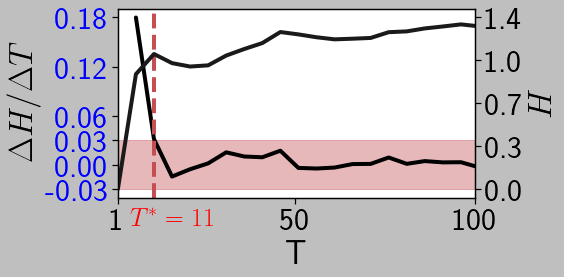

<Figure size 864x288 with 0 Axes>

In [86]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

pr = 'sp' 
alg = 'appr'
data = 'ER_15_22'
input_folder = '5'
# data = 'flickr'
# data = 'rome'
# data = 'biomine'
_max = -1
invert = True
loop = 'T'
epsilon = [0.001,0.03][loop=='T']
step = 5
final = []
for q in [2,4]:
    qset = str(q)+'.queries.csv'
    # qset = str(q)+'.queries_NLoops.csv'
    fname = input_folder +'/measure_'+data+'_'+alg+'_'+pr+'_'+qset 
    print('input file: ',fname)
    df = pd.read_csv(fname)
    df[loop] = df[loop].astype('int')
    print('input shape: ',df.shape)
    # print(df[loop].head(10))
    # print(df[loop]%5 == 1)
    if step>1:
        df = df[df[loop]% step==1]
    final.append(df)
df = pd.concat(final)
if invert:
    df  = df.iloc[::-1]
avg_df = df.groupby(loop)[['N','T','H']].mean()
avg_df['dHdN'] = avg_df['H'].diff()/avg_df[loop].diff()
boole = (avg_df['dHdN'].abs()<=epsilon)
_last_False =  (boole[boole==False].index[-1])
opt = avg_df[avg_df.index==_last_False][loop].values[0]
print('optimal ',loop,' : ',opt) 

from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34
labelsize = 26
lw = 4
avg_df['dHdN'].plot(xlim=(1,100), figsize=(8,4),lw=lw)
# plt.show()
# plt.clf()
# avg_df.plot(loop,'dHdN',figsize=(8,4),lw=lw,legend = None)
ax = plt.gca()
if data == 'ER_15_22':
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax.axvline(opt,linestyle='--',color='r',linewidth=lw)
ax.text(opt+5, -.05, '$'+loop+'^*='+str(opt)+'$', color='red', fontsize = fontsize-8, \
        transform=ax.get_xaxis_transform(), ha='center', va='top')
x = avg_df[loop] # np.arange(avg_df.shape[0])
zero = np.zeros_like(x)
eps = np.ones_like(x)*epsilon
# plt.plot(x, zero, 'k-',axes=ax)
plt.fill_between(x, zero - eps, zero + eps, color='r', alpha=0.4)

plt.ylabel('$\Delta H/\Delta '+loop+'$',fontsize=fontsize)
plt.xlabel(loop,fontsize=fontsize)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# plt.xticks(np.linspace(avg_df[loop].min(),avg_df[loop].max()//2,3),fontsize=fontsize-2)
plt.xticks([1,50,100], fontsize=fontsize-2)
plt.yticks([-epsilon,0,epsilon]+np.linspace(2*epsilon,avg_df['dHdN'].max(),3).tolist(),fontsize=fontsize-2,color='blue')
# plt.yticks([-0.03,0,0.03,0.06,avg_df['dHdN'].max()],fontsize=fontsize-2)
# ax.rig
ax2 = ax.twinx()
avg_df.plot(loop,'H',ax=ax2,color='k',legend=None,lw=lw)
plt.yticks(np.linspace(avg_df['H'].min(),avg_df['H'].max(),5),fontsize=fontsize-2)
plt.ylabel('$H$',fontsize=fontsize)
ax = plt.gca()
if data == 'ER_15_22':
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_yticks('left',fontsize=fontsize-2)
# print(avg_df['H'])
# plt.xlim((1,100))
# plt.legend(loc = 'upper left', fontsize=fontsize+6, bbox_to_anchor=(0.8,1.01),frameon = False,prop={"size":28})
plt.tight_layout()
print('saving figure: ',output_folder+'/er_'+alg+'_'+pr+'_'+loop+'loop.pdf')
plt.savefig(output_folder+'/er_'+alg+'_'+pr+'_'+loop+'loop.pdf')
plt.show()
plt.clf()

Figure 5
----

input file:  7_3_1/reduce_k_3_K_10_ER_15_22_greedyp_reach_3.queries.csv 7_3_1/reduce_k_3_K_10_ER_15_22_greedy_reach_3.queries.csv
3   (5, 17)   (1, 15)   (4, 14)
input file:  7_3_1/reduce_k_4_K_10_ER_15_22_greedyp_reach_4.queries.csv 7_3_1/reduce_k_4_K_10_ER_15_22_greedy_reach_4.queries.csv
4   (5, 17)   (5, 15)   (5, 14)
   k  greedy+struct  greedy     exact
0  3       0.165789     0.0  0.190367
1  4       0.092237     0.0  0.092237
saving figure:  figs/reduce_ER_15_22_reach.pdf


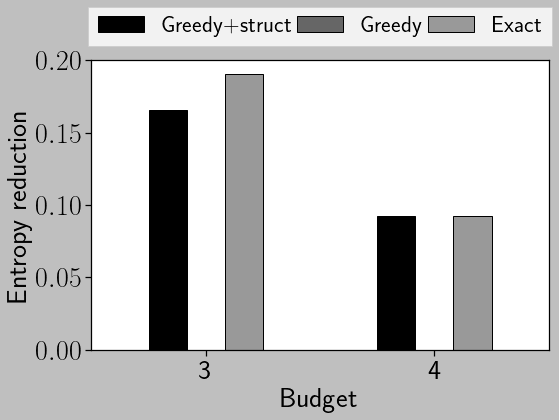

In [66]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')

# folder = 'reduce_mainP/'
folder = '7_3_1/'
data = 'ER_15_22'
alg0 = 'greedyp'
a0 = 'greedyp'
alg1 = 'greedy'
a1 = 'greedy'
q =   'reach'
# q = 'sp'

# 'mcdij' #'mcbfs' #
est_alg = 'exact'
# est_alg = 'mcbfs'
# kset = [3,4,5]
kset = [3,4]
varyK0 = [] #greedy+struct
varyK1  = [] #greedy
exact = [] 
# est_alg = ['mcbfs','mcdij'][q == 'sp']
for k in kset:
    # qset = str(k)
    qset = 4
    name0 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg0+'_'+q+'_'+str(k)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(k)+'.queries.csv'
    print('input file: ',name0,name1)
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    
    # if k==4:
    #     df0 = df0.iloc[0]
    #     df1=df1.iloc[0]
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)

    try:
        exactcsv = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(k)+'.queries.csv'
        exactdf = pd.read_csv(exactcsv) 
    except:
        exactdf = pd.DataFrame()  
    exact.append(exactdf)
    print(k,' ',df0.shape,' ',df1.shape,' ',exactdf.shape)

exact_red = []
stde_red = []
greedy_red = []
greedyp_red = []
std_red = []
stdp_red = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
    greedyp_red.append(mean)
    stdp_red.append(std)
    
    mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
    greedy_red.append(mean)
    std_red.append(std)

    try:
        mean,std = exact[i]['DeltaH'].mean(), exact[i]['DeltaH'].std()
    except:
        mean,std = None,None 
    exact_red.append(mean)
    stde_red.append(std)

df = pd.DataFrame(zip(kset,greedyp_red,greedy_red,exact_red),columns = ['k','greedy+struct','greedy','exact'])
print(df.head())
df = df.rename(columns={"greedy+struct": "Greedy+struct", 'greedy':'Greedy','exact':'Exact'})
ax = df.plot(x="k", y=["Greedy+struct","Greedy","Exact"], kind="bar",rot=0)
# plt.yscale('log',base=10)
# plt.bar(kset,greedyp_red)
# #     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# # plt.xscale('log',base=2)
# # greedy_red = np.array(greedy_red)
# # std_red = np.array(std_red)
# # print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
# plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
# plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
# # plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
# #                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')
# plt.yscale('log',base=2)
# plt.xscale('log',base=2)
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Entropy reduction',fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
plt.yticks([0,0.05,0.1,0.15, 0.2],fontsize=fontsize)
plt.xticks(fontsize=fontsize)
# plt.yscale('log')
# ax = plt.gca()
# ax.set_xticklabels(xlabels)
# plt.yticks(fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize-7, ncol = 3)
# plt.legend(fontsize=fontsize-3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.01),\
          ncol=3, fancybox=False, shadow=False,fontsize=labelsize+1,columnspacing=0.2)
# plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = output_folder+'/reduce_'+data+"_"+q+".pdf"
print('saving figure: ',fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

input file:  7_3_1/reduce_k_3_K_10_ER_15_22_greedyp_sp_3.queries.csv 7_3_1/reduce_k_3_K_10_ER_15_22_greedy_sp_3.queries.csv
3   (5, 17)   (1, 15)   (3, 14)
input file:  7_3_1/reduce_k_4_K_10_ER_15_22_greedyp_sp_4.queries.csv 7_3_1/reduce_k_4_K_10_ER_15_22_greedy_sp_4.queries.csv
4   (2, 17)   (5, 15)   (2, 14)
   k  greedy+struct  greedy     exact
0  3       0.188115     0.0  0.235408
1  4       0.140714     0.0  0.140714
saving figure:  figs/reduce_ER_15_22_sp.pdf


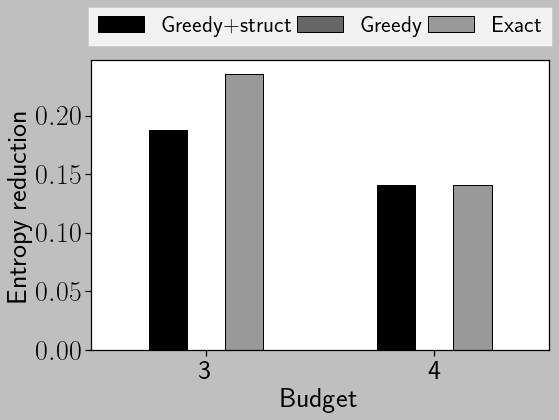

In [67]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')

# folder = 'reduce_mainP/'
folder = '7_3_1/'
data = 'ER_15_22'
alg0 = 'greedyp'
a0 = 'greedyp'
alg1 = 'greedy'
a1 = 'greedy'
q = 'sp'

# 'mcdij' #'mcbfs' #
est_alg = 'exact'
# est_alg = 'mcbfs'
kset = [3,4]
# kset = [3,4]
varyK0 = [] #greedy+struct
varyK1  = [] #greedy
exact = [] 
# est_alg = ['mcbfs','mcdij'][q == 'sp']
for k in kset:
    # qset = str(k)
    qset = 4
    name0 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg0+'_'+q+'_'+str(k)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(k)+'.queries.csv'
    print('input file: ',name0,name1)
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    
    # if k==4:
    #     df0 = df0.iloc[0]
    #     df1=df1.iloc[0]
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)

    try:
        exactcsv = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(k)+'.queries.csv'
        exactdf = pd.read_csv(exactcsv) 
    except:
        exactdf = pd.DataFrame()  
    exact.append(exactdf)
    print(k,' ',df0.shape,' ',df1.shape,' ',exactdf.shape)

exact_red = []
stde_red = []
greedy_red = []
greedyp_red = []
std_red = []
stdp_red = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
    greedyp_red.append(mean)
    stdp_red.append(std)
    
    mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
    greedy_red.append(mean)
    std_red.append(std)

    try:
        mean,std = exact[i]['DeltaH'].mean(), exact[i]['DeltaH'].std()
    except:
        mean,std = None,None 
    exact_red.append(mean)
    stde_red.append(std)

df = pd.DataFrame(zip(kset,greedyp_red,greedy_red,exact_red),columns = ['k','greedy+struct','greedy','exact'])
print(df.head())
df = df.rename(columns={"greedy+struct": "Greedy+struct", 'greedy':'Greedy','exact':'Exact'})
ax = df.plot(x="k", y=["Greedy+struct","Greedy","Exact"], kind="bar",rot=0)
# plt.yscale('log',base=10)
# plt.bar(kset,greedyp_red)
# #     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# # plt.xscale('log',base=2)
# # greedy_red = np.array(greedy_red)
# # std_red = np.array(std_red)
# # print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
# plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
# plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
# # plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
# #                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')
# plt.yscale('log',base=2)
# plt.xscale('log',base=2)
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Entropy reduction',fontsize=fontsize)
# plt.yticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
# plt.yscale('log')
# ax = plt.gca()
# ax.set_xticklabels(xlabels)
# plt.yticks(fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize-7, ncol = 3)
# plt.legend(fontsize=fontsize-3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.01),\
          ncol=3, fancybox=False, shadow=False,fontsize=labelsize+1,columnspacing=0.2)
# plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = output_folder+'/reduce_'+data+"_"+q+".pdf"
print('saving figure: ',fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

input files:  7_3_1/reduce_k_3_K_10_ER_15_22_greedyp_reach_4.queries.csv 7_3_1/reduce_k_3_K_10_ER_15_22_greedy_reach_4.queries.csv
3   (5, 17)   (5, 15)   (2, 14)
input files:  7_3_1/reduce_k_4_K_10_ER_15_22_greedyp_reach_4.queries.csv 7_3_1/reduce_k_4_K_10_ER_15_22_greedy_reach_4.queries.csv
4   (5, 17)   (5, 15)   (5, 14)
   k  greedy+struct       greedy          exact
0  3     203.752657  5654.257981  119208.368172
1  4     274.318378  7243.716559  517654.209800
saving figure:  figs/reduce_ER_15_22_reach_time.pdf


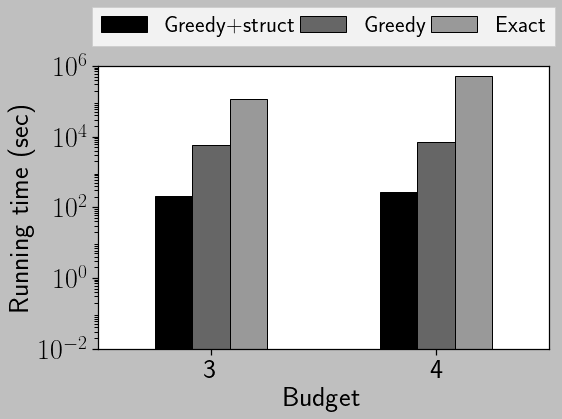

In [77]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')


folder = '7_3_1/'
data = 'ER_15_22'
alg0 = 'greedyp'
a0 = 'greedyp'
alg1 = 'greedy'
a1 = 'greedy'
q =   'reach'
# q = 'sp'

est_alg = 'exact'
kset = [3, 4]
varyK0 = [] #greedy+struct
varyK1  = [] #greedy
exact = []
# est_alg = ['mcbfs','mcdij'][q == 'sp']
for k in kset:
    qset = str(4)
    name0 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(qset)+'.queries.csv'
    print('input files: ',name0,name1)
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)
    try:
        exactcsv = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(qset)+'.queries.csv'
        exactdf = pd.read_csv(exactcsv)   
    except:
        exactdf = pd.DataFrame()  
    exact.append(exactdf)
    print(k,' ',df0.shape,' ',df1.shape,' ',exactdf.shape)
        
exact_red = []
stde_red = []
greedy_red = []
greedyp_red = []
std_red = []
stdp_red = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['execution_time'].mean(), varyK0[i]['execution_time'].std()
    greedyp_red.append(mean)
    stdp_red.append(std)
    
    mean,std = varyK1[i]['execution_time'].mean(), varyK1[i]['execution_time'].std()
    greedy_red.append(mean)
    std_red.append(std)

    if len(exact[i])>0:
        mean,std = exact[i]['execution_time'].mean(), exact[i]['execution_time'].std()
    else:
        mean,std = None,None
    exact_red.append(mean)
    stde_red.append(std)

df = pd.DataFrame(zip(kset,greedyp_red,greedy_red,exact_red),columns = ['k','greedy+struct','greedy','exact'])
print(df.head())
df = df.rename(columns={"greedy+struct": "Greedy+struct", 'greedy':'Greedy','exact':'Exact'})
ax = df.plot(x="k", y=["Greedy+struct","Greedy","Exact"], kind="bar",rot=0)
plt.yscale('log',base=10)
# plt.bar(kset,greedyp_red)
# #     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# # plt.xscale('log',base=2)
# # greedy_red = np.array(greedy_red)
# # std_red = np.array(std_red)
# # print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
# plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
# plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
# # plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
# #                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')
# plt.yscale('log',base=2)
# plt.xscale('log',base=2)
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Running time (sec)',fontsize=fontsize)
plt.yticks([10**-2,10**0, 10**2,10**4, 10**6],fontsize=fontsize)
plt.xticks(fontsize=fontsize)
# ax = plt.gca()
# ax.set_xticklabels(xlabels)
# plt.yticks(fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize-7, ncol = 3)
# plt.legend(fontsize=fontsize)
# plt.title('Budget = '+str(k),fontsize=fontsize-8)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.03),\
          ncol=3, fancybox=False, shadow=False,fontsize=labelsize+1,columnspacing=0.2)
fname = output_folder+'/reduce_'+data+"_"+q+"_time.pdf"
print('saving figure: ', fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

input files:  7_3_1/reduce_k_3_K_10_ER_15_22_greedyp_sp_4.queries.csv 7_3_1/reduce_k_3_K_10_ER_15_22_greedy_sp_4.queries.csv
3   (5, 17)   (5, 15)   (5, 14)
input files:  7_3_1/reduce_k_4_K_10_ER_15_22_greedyp_sp_4.queries.csv 7_3_1/reduce_k_4_K_10_ER_15_22_greedy_sp_4.queries.csv
4   (2, 17)   (5, 15)   (2, 14)
   k  greedy+struct       greedy          exact
0  3     223.948125  6033.749902  130725.929189
1  4     296.855868  7777.631171  508041.506031
saving figure:  figs/reduce_ER_15_22_sp_time.pdf


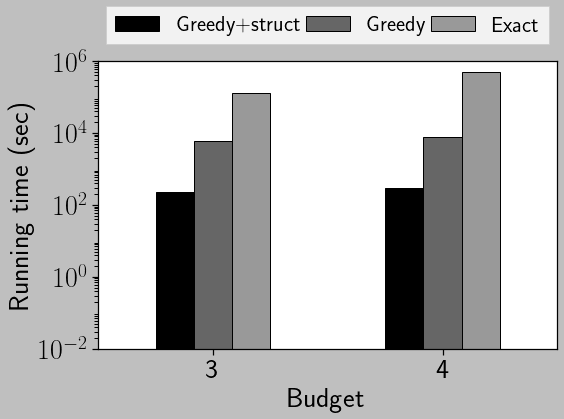

In [78]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')


folder = '7_3_1/'
data = 'ER_15_22'
alg0 = 'greedyp'
a0 = 'greedyp'
alg1 = 'greedy'
a1 = 'greedy'
q = 'sp'

est_alg = 'exact'
kset = [3, 4]
varyK0 = [] #greedy+struct
varyK1  = [] #greedy
exact = []
# est_alg = ['mcbfs','mcdij'][q == 'sp']
for k in kset:
    qset = str(4)
    name0 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(qset)+'.queries.csv'
    print('input files: ',name0,name1)
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)
    try:
        exactcsv = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(qset)+'.queries.csv'
        exactdf = pd.read_csv(exactcsv)   
    except:
        exactdf = pd.DataFrame()  
    exact.append(exactdf)
    print(k,' ',df0.shape,' ',df1.shape,' ',exactdf.shape)
        
exact_red = []
stde_red = []
greedy_red = []
greedyp_red = []
std_red = []
stdp_red = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['execution_time'].mean(), varyK0[i]['execution_time'].std()
    greedyp_red.append(mean)
    stdp_red.append(std)
    
    mean,std = varyK1[i]['execution_time'].mean(), varyK1[i]['execution_time'].std()
    greedy_red.append(mean)
    std_red.append(std)

    if len(exact[i])>0:
        mean,std = exact[i]['execution_time'].mean(), exact[i]['execution_time'].std()
    else:
        mean,std = None,None
    exact_red.append(mean)
    stde_red.append(std)

df = pd.DataFrame(zip(kset,greedyp_red,greedy_red,exact_red),columns = ['k','greedy+struct','greedy','exact'])
print(df.head())
df = df.rename(columns={"greedy+struct": "Greedy+struct", 'greedy':'Greedy','exact':'Exact'})
ax = df.plot(x="k", y=["Greedy+struct","Greedy","Exact"], kind="bar",rot=0)
plt.yscale('log',base=10)
# plt.bar(kset,greedyp_red)
# #     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# # plt.xscale('log',base=2)
# # greedy_red = np.array(greedy_red)
# # std_red = np.array(std_red)
# # print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
# plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
# plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
# # plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
# #                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')
# plt.yscale('log',base=2)
# plt.xscale('log',base=2)
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Running time (sec)',fontsize=fontsize)
plt.yticks([10**-2,10**0, 10**2,10**4, 10**6],fontsize=fontsize)
plt.xticks(fontsize=fontsize)
# ax = plt.gca()
# ax.set_xticklabels(xlabels)
# plt.yticks(fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize-7, ncol = 3)
# plt.legend(fontsize=fontsize)
# plt.title('Budget = '+str(k),fontsize=fontsize-8)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02),\
          ncol=3, fancybox=False, shadow=False,fontsize=labelsize,columnspacing=0.2)
fname = output_folder+'/reduce_'+data+"_"+q+"_time.pdf"
print('saving figure: ', fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

Figure 6
----

---- budget ----  5
baseline:  7_3_2/TKDE_products_5_maxd_5.csv
ours =  7_3_2/reduce_k_5_K_10_products_greedyp_reach_d_5.queries.csv
---- budget ----  10
baseline:  7_3_2/TKDE_products_10_maxd_5.csv
ours =  7_3_2/reduce_k_10_K_10_products_greedyp_reach_d_5.queries.csv
---- budget ----  15
baseline:  7_3_2/TKDE_products_15_maxd_5.csv
ours =  7_3_2/reduce_k_15_K_10_products_greedyp_reach_d_5.queries.csv
---- budget ----  20
baseline:  7_3_2/TKDE_products_20_maxd_5.csv
ours =  7_3_2/reduce_k_20_K_10_products_greedyp_reach_d_5.queries.csv
saving file:  figs/sota_products_effec.pdf


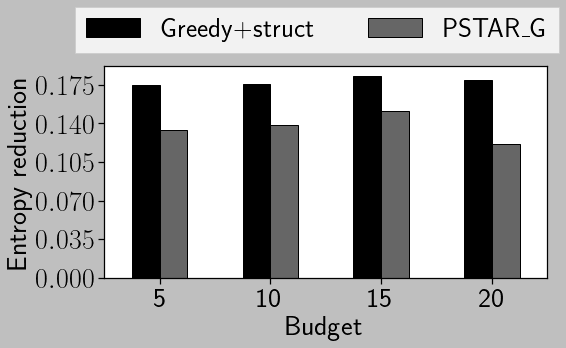

In [76]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
def remove(df):
    dfnew = pd.DataFrame()
    for name,group in df.groupby(by=['source','target']):
        cond1 = (group["H0"]<=0).any()
        cond2 = (group["DeltaH"]<=0).any()
        if cond1==False and cond2==False:
            dfnew = pd.concat([dfnew, group])
    return dfnew 
means = []
algorithms = []
times = []
budgets = []
data = 'products'
input_folder = '7_3_2'
kset = [5,10,15,20]
hop=str(5)
for k in kset:
    print('---- budget ---- ',k)
    baseline_f = input_folder+'/TKDE_'+data+'_'+str(k)+'_maxd_'+hop+'.csv'
    ours = input_folder+'/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_'+hop+'.queries.csv'
    print('baseline: ',baseline_f)
    b_df = pd.read_csv(baseline_f)
    print('ours = ',ours)
    o_df1 = pd.read_csv(ours)
    cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset']
    concat_df = pd.concat((b_df[cols],o_df1[cols]))
    concat_df = remove(concat_df)
    b_df = concat_df[concat_df['algorithm']=='TKDE17']
    o_df = concat_df[concat_df['algorithm']=='greedy+struct']
    # o_df = pd.concat([o_df1,o_df2])
    # # b_df = b_df[b_df.qset == 2]
    # # o_df = o_df[o_df.qset == 2]
    # # b_df = b_df[b_df.qset == 4]
    # # o_df = o_df[o_df.qset == 4]
    # b_df = remove(b_df)
    # o_df = remove(o_df)

    
    means.append(b_df['DeltaH'].mean())
    times.append(b_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('PSTAR\_G')

    means.append(o_df['DeltaH'].mean())
    times.append(o_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('Greedy+struct')
    
    # qsets = [2,4]
    # for q in qsets:
    #     # print(b_df.groupby("qset"))
    #     df = b_df[b_df.qset == q]
    #     print('baeline shape: ',df.shape)
    #     print('Baseline: ', q,' ',df['DeltaH'].mean())
    #     df = o_df[o_df.qset == q]
    #     # print(df.head())
    #     print('ours shape: ',df.shape)
    #     print('Ours: ', q,' ',df['DeltaH'].mean())
df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# df.head()
# sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# df.plot.bar(rot=0)
# axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# axes[1].legend(loc=2)  
ax = df.pivot(index='budget', columns='algo', values='ent').plot(kind='bar',rot=0)
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Entropy reduction',fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(np.linspace(0,0.175,6), fontsize=fontsize)
plt.legend(loc='lower center', bbox_to_anchor=(0.48, 1),\
          ncol=2, fancybox=False, shadow=False,fontsize=fontsize-1)
fname = 'figs/sota_'+data+'_effec.pdf'
print('saving file: ',fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

---- budget ----  5
baseline:  7_3_2/TKDE_products_5_maxd_5.csv
ours =  7_3_2/reduce_k_5_K_10_products_greedyp_reach_d_5.queries.csv
---- budget ----  10
baseline:  7_3_2/TKDE_products_10_maxd_5.csv
ours =  7_3_2/reduce_k_10_K_10_products_greedyp_reach_d_5.queries.csv
---- budget ----  15
baseline:  7_3_2/TKDE_products_15_maxd_5.csv
ours =  7_3_2/reduce_k_15_K_10_products_greedyp_reach_d_5.queries.csv
---- budget ----  20
baseline:  7_3_2/TKDE_products_20_maxd_5.csv
ours =  7_3_2/reduce_k_20_K_10_products_greedyp_reach_d_5.queries.csv
saving file:  figs/sota_products_effic.pdf


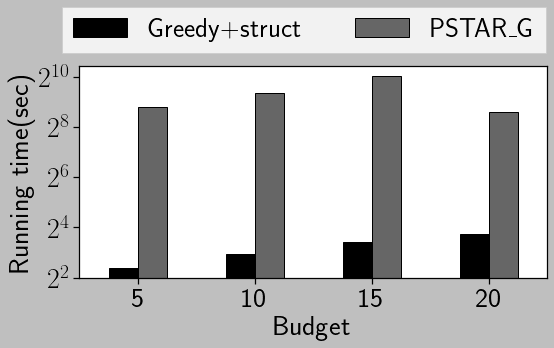

In [73]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')


means = []
algorithms = []
times = []
budgets = []
data = 'products'
input_folder = '7_3_2'
kset = [5,10,15,20]
hop=str(5)
for k in kset:
    print('---- budget ---- ',k)
    baseline_f = input_folder+'/TKDE_'+data+'_'+str(k)+'_maxd_'+hop+'.csv'
    ours = input_folder+'/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_'+hop+'.queries.csv'
    print('baseline: ',baseline_f)
    b_df = pd.read_csv(baseline_f)
    print('ours = ',ours)
    o_df1 = pd.read_csv(ours)
    cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset']
    concat_df = pd.concat((b_df[cols],o_df1[cols]))
    concat_df = remove(concat_df)
    b_df = concat_df[concat_df['algorithm']=='TKDE17']
    o_df = concat_df[concat_df['algorithm']=='greedy+struct']

    means.append(b_df['DeltaH'].mean())
    times.append(b_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('PSTAR\_G')

    means.append(o_df['DeltaH'].mean())
    times.append(o_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('Greedy+struct')
    
    # qsets = [2,4]
    # for q in qsets:
    #     # print(b_df.groupby("qset"))
    #     df = b_df[b_df.qset == q]
    #     print('baeline shape: ',df.shape)
    #     print('Baseline: ', q,' ',df['DeltaH'].mean())
    #     df = o_df[o_df.qset == q]
    #     # print(df.head())
    #     print('ours shape: ',df.shape)
    #     print('Ours: ', q,' ',df['DeltaH'].mean())
df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# df.head()
# sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# df.plot.bar(rot=0)
# axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# axes[1].legend(loc=2)  
ax = df.pivot(index='budget', columns='algo', values='time').plot(kind='bar',rot=0)
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Running time(sec)',fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yscale('log',base=2)
plt.yticks([2**2,2**4,2**6,2**8,2**10],fontsize=fontsize)
plt.legend(loc='lower center', bbox_to_anchor=(0.48, 1),\
          ncol=2, fancybox=False, shadow=False,fontsize=fontsize-1)
fname = output_folder+'/sota_'+data+'_effic.pdf'
print('saving file: ',fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

Figure 7
---

5
input file:  7_3_3/reduce_k_5_K_10_products_greedyp_reach_d_5.queries.csv
5 non-ad:  (10, 18)  ad:  (10, 18)
input file:  7_3_3/reduce_k_10_K_10_products_greedyp_reach_d_5.queries.csv
10 non-ad:  (13, 18)  ad:  (13, 18)
input file:  7_3_3/reduce_k_15_K_10_products_greedyp_reach_d_5.queries.csv
15 non-ad:  (13, 18)  ad:  (13, 18)
input file:  7_3_3/reduce_k_20_K_10_products_greedyp_reach_d_5.queries.csv
20 non-ad:  (12, 18)  ad:  (12, 18)
    r  Non-adaptive  Adaptive   ada_err  nonada_err   k
0   3      0.223952  0.136317  0.156999    0.112381   5
1   6      0.240690  0.143691  0.140031    0.109072  10
2   9      0.259904  0.157739  0.155743    0.136226  15
3  12      0.270866  0.176215  0.145799    0.142530  20
saving file:  figs/varyk_products_reach_Q5_ad_nonad.pdf


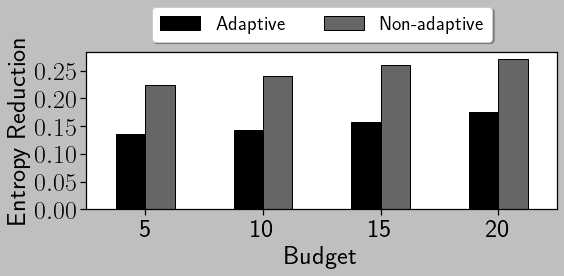

In [70]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')

folder = '7_3_3/'
# folder = 'output/baby/CRureduct2/'
# folder = 'p/adap_products/'
# folder = 'products_cr/'

# K = 32
# data = 'papers'
# data = 'restaurants'
data = 'products'
alg0 = 'greedyp'
a0 = 'greedyp'
q = 'reach'
# qset = range(1,6)
qset = 5
budgets = range(5,21,5)
print(qset)
varyK0 = [] #non-ada
varyK1  = [] #ada
est_alg = 'mcbfs'
ignore_negative = True

def remove(df):
    dfnew = pd.DataFrame()
    for name,group in df.groupby(by=['source','target']):
        cond1 = (group["H0"]<=0).any()
        cond2 = (group["DeltaH"]<=0).any()
        if cond1==False and cond2==False:
            dfnew = pd.concat([dfnew, group])
    return dfnew 

for k in budgets:
    k = str(k)
    # reduce_k_2_K_10_restaurants_greedyp_reach_dhop.queries.csv
    name0 = folder+'reduce_k_'+k+'_K_10_'+data+'_'+alg0+'_'+q+'_d_'+str(qset)+'.queries.csv'
    print('input file: ', name0)
    df0 = pd.read_csv(name0)
    # for group in df0.groupby(['source','target']):
    #     print(group)
    #     break 
    # df0 = df0[df0['r']<10]
    # print(df0['H0'])
    # df0 = df0[df0['H0'].astype(float)>0]
    df0 = remove(df0)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    # if ignore_negative:
    #     df0 = df0[df0['DeltaH']>0]
    #     df1 = df1[df1['DeltaH']>0]
    # df0 = df0[df0['H0'].values >0]
    # df1 = df1[df1['H0'].values >0]
    print(k,'non-ad: ',df0.shape,' ad: ',df1.shape)
    varyK0.append(df0) 
    varyK1.append(df1) 

df0 = pd.concat(varyK0)
df1 = pd.concat(varyK1)
# print(df0.groupby('r')['DeltaH'].count())
# print(df1.groupby('r')['DeltaH'].count())
final_df = pd.DataFrame(df0.groupby('r')['DeltaH'].mean()).reset_index()
final_df = final_df.rename(columns={"r": "r", "DeltaH": "Non-adaptive"})
final_df['Adaptive'] = df1.groupby('r')['DeltaH'].mean().values
final_df['ada_err'] = df0.groupby('r')['DeltaH'].std().values
final_df['nonada_err'] = df1.groupby('r')['DeltaH'].std().values
final_df['r'] = final_df['r'].astype(int)
final_df['k'] = (final_df['r']*qset/3).astype(int)
print(final_df)
# ax = final_df.plot(x="r", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# plt.xlabel('r', fontsize=fontsize-2)
ax = final_df.plot(x="k", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# sns.barplot(final_df, x="k",y=["Adaptive","Non-adaptive"])
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Entropy Reduction',fontsize=fontsize-2)

plt.xticks(fontsize=fontsize-2)
# plt.yticks([0.01,0.04,0.07,0.1,0.13, 0.16],fontsize=fontsize-2)
# plt.yticks([0.22,0.28,0.34,0.40],fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# ax.tick_params(axis='both', labelsize=fontsize)
# plt.yscale('log',base=10)
# plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
# plt.legend(fontsize=fontsize,loc='best',prop={"size":20})
# plt.title('Budget = '+k,fontsize=fontsize-8)
# ax = plt.gca()
# 
# 
# ax.set_yscale('log')
# ax.get_yaxis().set_major_formatter(ScalarFormatter())
# ax.tick_params(axis = 'y', which = 'both', labelsize = fontsize-2)
# ax.ticklabel_format(axis='y',style = 'sci', scilimits=(0,0))
# plt.yticks([0, 0.1,0.2,0.3,0.4], fontsize=fontsize-2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
          ncol=2, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = output_folder+'/varyk_'+data+"_"+q+'_Q'+str(qset)+'_ad_nonad.pdf'
print('saving file: ',fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

input file:  7_3_3/reduce_k_5_K_10_products_greedyp_reach_d_5.queries.csv
input file:  7_3_3/reduce_k_10_K_10_products_greedyp_reach_d_5.queries.csv
input file:  7_3_3/reduce_k_15_K_10_products_greedyp_reach_d_5.queries.csv
input file:  7_3_3/reduce_k_20_K_10_products_greedyp_reach_d_5.queries.csv
saving file:  figs/varyk_products_reach_Q5_ad_nonad_tm.pdf


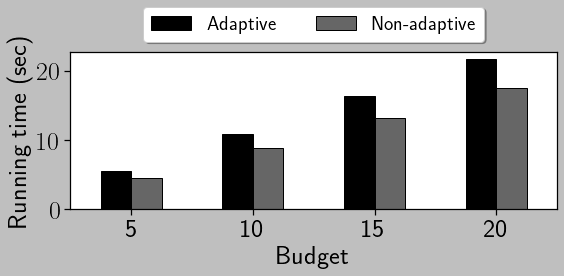

In [84]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')

folder = '7_3_3/'

# K = 32
# data = 'papers'
# data = 'restaurants'
data = 'products'
alg0 = 'greedyp'
a0 = 'greedyp'
q = 'reach'
# qset = range(1,6)
qset = 5
budgets = range(5,21,5)
varyK0 = [] #non-ada
varyK1  = [] #ada
est_alg = 'mcbfs'
ignore_negative = True

def remove(df):
    dfnew = pd.DataFrame()
    for name,group in df.groupby(by=['source','target']):
        cond1 = (group["H0"]<=0).any()
        cond2 = (group["DeltaH"]<=0).any()
        if cond1==False and cond2==False:
            dfnew = pd.concat([dfnew, group])
    return dfnew 

for k in budgets:
    k = str(k)
    # reduce_k_2_K_10_restaurants_greedyp_reach_dhop.queries.csv
    name0 = folder+'reduce_k_'+k+'_K_10_'+data+'_'+alg0+'_'+q+'_d_'+str(qset)+'.queries.csv'
    print('input file: ',name0)
    df0 = pd.read_csv(name0)
    # for group in df0.groupby(['source','target']):
    #     print(group)
    #     break 
    # df0 = df0[df0['r']<10]
    # print(df0['H0'])
    # df0 = df0[df0['H0'].astype(float)>0]
    df0 = remove(df0)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    # if ignore_negative:
    #     df0 = df0[df0['DeltaH']>0]
    #     df1 = df1[df1['DeltaH']>0]
    # df0 = df0[df0['H0'].values >0]
    # df1 = df1[df1['H0'].values >0]
    # print(k,'non-ad: ',df0.shape,' ad: ',df1.shape)
    varyK0.append(df0) 
    varyK1.append(df1) 

df0 = pd.concat(varyK0)
df1 = pd.concat(varyK1)
# print(df0.groupby('r')['DeltaH'].count())
# print(df1.groupby('r')['DeltaH'].count())
col = 'execution_time'
final_df = pd.DataFrame(df0.groupby('r')[col].mean()).reset_index()
final_df = final_df.rename(columns={"r": "r", col: "Non-adaptive"})
final_df['Adaptive'] = df1.groupby('r')[col].mean().values
final_df['ada_err'] = df0.groupby('r')[col].std().values
final_df['nonada_err'] = df1.groupby('r')[col].std().values
final_df['r'] = final_df['r'].astype(int)
final_df['k'] = (final_df['r']*qset/3).astype(int)
# print(final_df)
# ax = final_df.plot(x="r", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# plt.xlabel('r', fontsize=fontsize-2)
ax = final_df.plot(x="k", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# sns.barplot(final_df, x="k",y=["Adaptive","Non-adaptive"])
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Running time (sec)',fontsize=fontsize-2)

plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# ax.tick_params(axis='both', labelsize=fontsize)
# plt.yscale('log',base=10)
# plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
# plt.legend(fontsize=fontsize,loc='best',prop={"size":20})
# plt.title('Budget = '+k,fontsize=fontsize-8)
# ax = plt.gca()
# 
# 
# ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.tick_params(axis = 'y', which = 'both', labelsize = fontsize-2)
# ax.ticklabel_format(axis='y',style = 'sci', scilimits=(0,0))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
          ncol=2, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = output_folder+'/varyk_'+data+"_"+q+'_Q'+str(qset)+'_ad_nonad_tm.pdf'
print('saving file: ',fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

Fig 8
----

In [64]:
# ## Add here
# from matplotlib import pyplot as plt 
# from matplotlib.ticker import ScalarFormatter
# plt.rcParams['text.usetex'] = True
# from matplotlib.lines import Line2D,lineStyles
# from itertools import cycle
# import seaborn as sns 
# import numpy as np
# import pandas as pd
# sns.set(rc={'figure.figsize':(8,4)})
# sns.set_style("dark", {'axes.grid' : False})
# sns.set_style("ticks")
# plt.style.use('grayscale')
# fontsize = 28
# labelsize = 22
# lw = 2

# means = []
# algorithms = []
# times = []
# budgets = []
# data = 'products'
# dfs = []
# for k in [5,10,15,20]:
#     print('---- budget ---- ',k)
#     o_df1 = pd.read_csv('7_3_4/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_5.queries.csv')
#     cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset','r','k']
#     grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()
#     grp['k'] = k
#     grp['r']= grp.index
#     # print(grp)
#     grp['r'] = 'r='+grp['r'].astype(str)
#     dfs.append(grp)

# df = pd.concat(dfs)
# # df.gro
# # df.shape 
# # means.append(b_df['DeltaH'].mean())
# # times.append(b_df['execution_time'].mean())
# # budgets.append(k)
# # algorithms.append('PSTAR\_G')

# # means.append(o_df['DeltaH'].mean())
# # times.append(o_df['execution_time'].mean())
# # budgets.append(k)
# # algorithms.append('Greedy+struct')

# # # qsets = [2,4]
# # # for q in qsets:
# # #     # print(b_df.groupby("qset"))
# # #     df = b_df[b_df.qset == q]
# # #     print('baeline shape: ',df.shape)
# # #     print('Baseline: ', q,' ',df['DeltaH'].mean())
# # #     df = o_df[o_df.qset == q]
# # #     # print(df.head())
# # #     print('ours shape: ',df.shape)
# # #     print('Ours: ', q,' ',df['DeltaH'].mean())
# # df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# # # df.head()
# # # sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# # # df.plot.bar(rot=0)
# # # axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# # # axes[1].legend(loc=2)  
# print(df.head())
# # print(df[df['k']==5])
# # df_5 = df[df['k']==5]
# # ax = df_5.plot(y='DeltaH', x = 'r', kind='bar',rot=0)
# # plt.show()
# ax = df.pivot(index='k', columns='r', values='DeltaH').plot(kind='bar',rot=0)
# plt.xlabel('Budget', fontsize=fontsize-2)
# plt.ylabel('Entropy reduction',fontsize=fontsize-2)

# plt.xticks(fontsize=fontsize-2)
# plt.yticks(fontsize=fontsize-2)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
#           ncol=4, fancybox=True, shadow=True,fontsize=labelsize-2)

# # fname = 'figs/hypparam_'+data+'_effec.pdf'
# # # print(fname)
# # plt.tight_layout()
# # plt.savefig(fname)
# plt.show()

---- budget ----  5
---- budget ----  10
---- budget ----  15
---- budget ----  20
     DeltaH  execution_time  k  r
r                                
1  0.051282      151.064574  5  1
2  0.052834      166.236352  5  2
3  0.052834      162.686777  5  3
6  0.052285      148.346169  5  6
9  0.053180      156.222438  5  9


<ipython-input-62-7d59a2f8e493>:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()


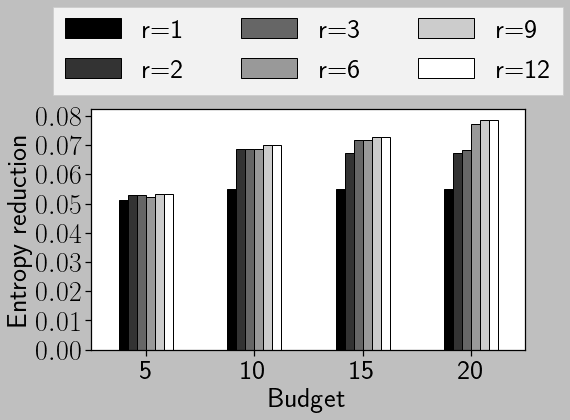

In [62]:
## Add here
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

means = []
algorithms = []
times = []
budgets = []
data = 'products'
dfs = []
for k in [5,10,15,20]:
    print('---- budget ---- ',k)
    o_df1 = pd.read_csv('7_3_4/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_5.queries.csv')
    cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset','r','k']
    grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()
    grp['k'] = k
    grp['r']= grp.index
    # print(grp)
    # grp['R'] = 'r='+grp['r'].astype(str)
    dfs.append(grp)

df = pd.concat(dfs)
# df.gro
# df.shape 
# means.append(b_df['DeltaH'].mean())
# times.append(b_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('PSTAR\_G')

# means.append(o_df['DeltaH'].mean())
# times.append(o_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('Greedy+struct')

# # qsets = [2,4]
# # for q in qsets:
# #     # print(b_df.groupby("qset"))
# #     df = b_df[b_df.qset == q]
# #     print('baeline shape: ',df.shape)
# #     print('Baseline: ', q,' ',df['DeltaH'].mean())
# #     df = o_df[o_df.qset == q]
# #     # print(df.head())
# #     print('ours shape: ',df.shape)
# #     print('Ours: ', q,' ',df['DeltaH'].mean())
# df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# # df.head()
# # sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# # df.plot.bar(rot=0)
# # axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# # axes[1].legend(loc=2)  
print(df.head())
# print(df[df['k']==5]) 
# df_5 = df[df['k']==5]
# ax = df_5.plot(y='DeltaH', x = 'r', kind='bar',rot=0)
# plt.show()
ax = df.pivot(index='k', columns='r', values='DeltaH').plot(kind='bar',rot=0,colormap='gray')
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Entropy reduction',fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
#           ncol=4, fancybox=True, shadow=True,fontsize=labelsize-2)
handles, previous_labels = ax.get_legend_handles_labels()

# bars = ax.patches
# hatches = ''.join(h*len(df) for h in 'x/O.')

# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)
ax.legend(handles=handles, labels=['r='+str(i) for i in [1,2,3,6,9,12]],loc='lower center', \
          bbox_to_anchor=(0.5, 1),\
          ncol=3, fancybox=False, shadow=False,fontsize=fontsize)
fname = 'figs/hypparam_'+data+'_effec.pdf'
# # print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

---- budget ----  5
---- budget ----  10
---- budget ----  15
---- budget ----  20
     DeltaH  execution_time  k  r
r                                
1  0.051282      151.064574  5  1
2  0.052834      166.236352  5  2
3  0.052834      162.686777  5  3
6  0.052285      148.346169  5  6
9  0.053180      156.222438  5  9


<ipython-input-47-082078ae7a86>:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()


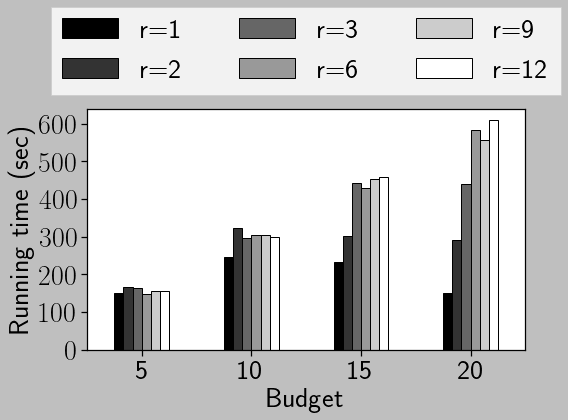

In [47]:
## Add here
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

means = []
algorithms = []
times = []
budgets = []
data = 'products'
dfs = []
for k in [5,10,15,20]:
    print('---- budget ---- ',k)
    o_df1 = pd.read_csv('7_3_4/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_5.queries.csv')
    cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset','r','k']
    grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()
    grp['k'] = k
    grp['r']= grp.index
    # print(grp)
    # grp['R'] = 'r='+grp['r'].astype(str)
    dfs.append(grp)

df = pd.concat(dfs)
# df.gro
# df.shape 
# means.append(b_df['DeltaH'].mean())
# times.append(b_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('PSTAR\_G')

# means.append(o_df['DeltaH'].mean())
# times.append(o_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('Greedy+struct')

# # qsets = [2,4]
# # for q in qsets:
# #     # print(b_df.groupby("qset"))
# #     df = b_df[b_df.qset == q]
# #     print('baeline shape: ',df.shape)
# #     print('Baseline: ', q,' ',df['DeltaH'].mean())
# #     df = o_df[o_df.qset == q]
# #     # print(df.head())
# #     print('ours shape: ',df.shape)
# #     print('Ours: ', q,' ',df['DeltaH'].mean())
# df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# # df.head()
# # sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# # df.plot.bar(rot=0)
# # axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# # axes[1].legend(loc=2)  
print(df.head())
# print(df[df['k']==5]) 
# df_5 = df[df['k']==5]
# ax = df_5.plot(y='DeltaH', x = 'r', kind='bar',rot=0)
# plt.show()
ax = df.pivot(index='k', columns='r', values='execution_time').plot(kind='bar',rot=0,colormap='gray')
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Running time (sec)',fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
#           ncol=4, fancybox=True, shadow=True,fontsize=labelsize-2)
handles, previous_labels = ax.get_legend_handles_labels()

# bars = ax.patches
# hatches = ''.join(h*len(df) for h in 'x/O.')

# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)
ax.legend(handles=handles, labels=['r='+str(i) for i in [1,2,3,6,9,12]],loc='lower center', \
          bbox_to_anchor=(0.5, 1),\
          ncol=3, fancybox=False, shadow=False,fontsize=fontsize)
fname = 'figs/hypparam_'+data+'_effic.pdf'
# # # print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

     DeltaH source target  execution_time        H0      algorithm    r   k
0  0.042517    NaN    NaN     2217.431022  4.651834  greedy+struct   16  20
1  0.052289    NaN    NaN     2256.429715  4.651834  greedy+struct  512  20
2  0.042517    NaN    NaN     3562.358929  4.651834  greedy+struct   16  30
3  0.063852    NaN    NaN     3652.398675  4.651834  greedy+struct  512  30
4  0.063852   None   None     5098.403945  4.651834  greedy+struct  512  40
5  0.042517    NaN    NaN     5118.232738  4.651834  greedy+struct   16  40


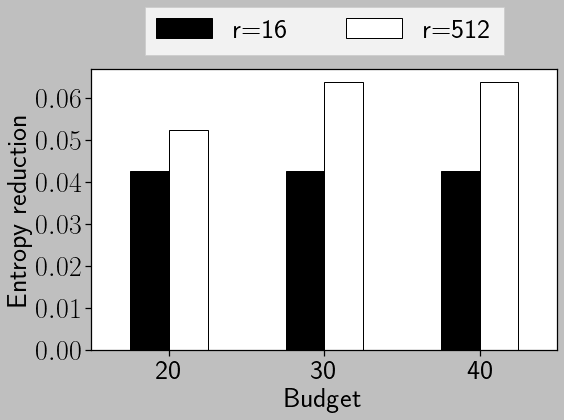

In [61]:
## Add here
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

means = []
algorithms = []
times = []
budgets = []
data = 'papers'
dfs = []
# for k in [5,10,15,20]:
#     print('---- budget ---- ',k)
#     o_df1 = pd.read_csv('7_3_4/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_5.queries.csv')
#     cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset','r','k']
#     grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()
#     grp['k'] = k
#     grp['r']= grp.index
#     # print(grp)
#     # grp['R'] = 'r='+grp['r'].astype(str)
#     dfs.append(grp)

# df = pd.concat(dfs)
df = pd.read_csv('7_3_4/papers_tri.csv')
df = df[['DeltaH','source','target','execution_time','H0','algorithm','r','k']]
# for k in [20,30,40]:
#     cols = ['DeltaH','source','target','execution_time','H0','algorithm','r','k']
#     grp = df[cols].groupby('r')['DeltaH','execution_time'].mean()
#     grp['k'] = k
#     grp['r']= grp.index
#     dfs.append(grp)
# df = pd.concat(dfs)

# df.shape 
# means.append(b_df['DeltaH'].mean())
# times.append(b_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('PSTAR\_G')

# means.append(o_df['DeltaH'].mean())
# times.append(o_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('Greedy+struct')

# # qsets = [2,4]
# # for q in qsets:
# #     # print(b_df.groupby("qset"))
# #     df = b_df[b_df.qset == q]
# #     print('baeline shape: ',df.shape)
# #     print('Baseline: ', q,' ',df['DeltaH'].mean())
# #     df = o_df[o_df.qset == q]
# #     # print(df.head())
# #     print('ours shape: ',df.shape)
# #     print('Ours: ', q,' ',df['DeltaH'].mean())
# df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# # df.head()
# # sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# # df.plot.bar(rot=0)
# # axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# # axes[1].legend(loc=2)  
print(df.head(6))
# print(df[df['k']==5]) 
# df_5 = df[df['k']==5]
# ax = df_5.plot(y='DeltaH', x = 'r', kind='bar',rot=0)
# plt.show()
ax = df.pivot(index='k', columns='r', values='DeltaH').plot(kind='bar',rot=0,colormap='gray')
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Entropy reduction',fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
#           ncol=4, fancybox=True, shadow=True,fontsize=labelsize-2)
handles, previous_labels = ax.get_legend_handles_labels()

# bars = ax.patches
# hatches = ''.join(h*len(df) for h in 'x/O.')

# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)
ax.legend(handles=handles, labels=['r='+str(i) for i in [16,512]],loc='lower center', \
          bbox_to_anchor=(0.5, 1),\
          ncol=3, fancybox=False, shadow=False,fontsize=fontsize)
fname = 'figs/hypparam_'+data+'_effec_tri.pdf'
# # print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

     DeltaH source target  execution_time        H0      algorithm    r   k
0  0.042517    NaN    NaN     2217.431022  4.651834  greedy+struct   16  20
1  0.052289    NaN    NaN     2256.429715  4.651834  greedy+struct  512  20
2  0.042517    NaN    NaN     3562.358929  4.651834  greedy+struct   16  30
3  0.063852    NaN    NaN     3652.398675  4.651834  greedy+struct  512  30
4  0.063852   None   None     5098.403945  4.651834  greedy+struct  512  40
5  0.042517    NaN    NaN     5118.232738  4.651834  greedy+struct   16  40


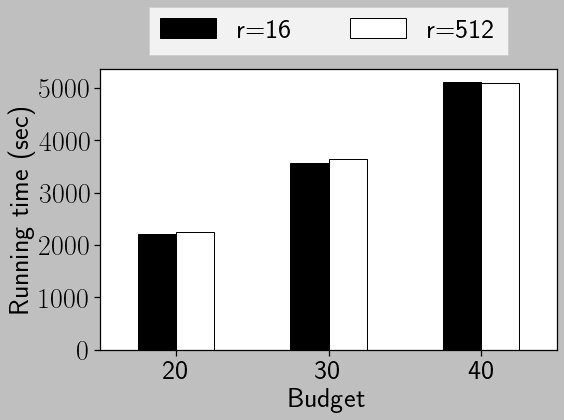

In [60]:
## Add here
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

means = []
algorithms = []
times = []
budgets = []
data = 'papers'
dfs = []
# for k in [5,10,15,20]:
#     print('---- budget ---- ',k)
#     o_df1 = pd.read_csv('7_3_4/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_5.queries.csv')
#     cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset','r','k']
#     grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()
#     grp['k'] = k
#     grp['r']= grp.index
#     # print(grp)
#     # grp['R'] = 'r='+grp['r'].astype(str)
#     dfs.append(grp)

# df = pd.concat(dfs)
df = pd.read_csv('7_3_4/papers_tri.csv')
df = df[['DeltaH','source','target','execution_time','H0','algorithm','r','k']]
# for k in [20,30,40]:
#     cols = ['DeltaH','source','target','execution_time','H0','algorithm','r','k']
#     grp = df[cols].groupby('r')['DeltaH','execution_time'].mean()
#     grp['k'] = k
#     grp['r']= grp.index
#     dfs.append(grp)
# df = pd.concat(dfs)

# df.shape 
# means.append(b_df['DeltaH'].mean())
# times.append(b_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('PSTAR\_G')

# means.append(o_df['DeltaH'].mean())
# times.append(o_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('Greedy+struct')

# # qsets = [2,4]
# # for q in qsets:
# #     # print(b_df.groupby("qset"))
# #     df = b_df[b_df.qset == q]
# #     print('baeline shape: ',df.shape)
# #     print('Baseline: ', q,' ',df['DeltaH'].mean())
# #     df = o_df[o_df.qset == q]
# #     # print(df.head())
# #     print('ours shape: ',df.shape)
# #     print('Ours: ', q,' ',df['DeltaH'].mean())
# df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# # df.head()
# # sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# # df.plot.bar(rot=0)
# # axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# # axes[1].legend(loc=2)  
print(df.head(6))
# print(df[df['k']==5]) 
# df_5 = df[df['k']==5]
# ax = df_5.plot(y='DeltaH', x = 'r', kind='bar',rot=0)
# plt.show()
ax = df.pivot(index='k', columns='r', values='execution_time').plot(kind='bar',rot=0,colormap='gray')
plt.xlabel('Budget', fontsize=fontsize)
plt.ylabel('Running time (sec)',fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
#           ncol=4, fancybox=True, shadow=True,fontsize=labelsize-2)
handles, previous_labels = ax.get_legend_handles_labels()

# bars = ax.patches
# hatches = ''.join(h*len(df) for h in 'x/O.')

# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)
ax.legend(handles=handles, labels=['r='+str(i) for i in [16,512]],loc='lower center', \
          bbox_to_anchor=(0.5, 1),\
          ncol=3, fancybox=False, shadow=False,fontsize=fontsize)
fname = 'figs/hypparam_'+data+'_effic_tri.pdf'
# # print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()